## LAB-4 EX-1
## 200968266
## ANKITA VEERABAHU



In [3]:
#import libraries
import pandas as pd
import numpy as np

#for visualisation
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # splitting the datasets
from sklearn.model_selection import GridSearchCV # to search for the optimal/ best model

from sklearn.tree import DecisionTreeClassifier # the classifier
from sklearn.metrics import roc_auc_score, roc_curve# evaluating prediction/ classifications of the model

#creating plot of decision tree
from sklearn import tree

#exporting decision tree
import graphviz

#other required libraries
import os
import pydotplus

In [163]:
df = pd.read_csv("German Credit Data.csv") # reading the dataset
df.head() #first 5 rows of dataset

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [164]:
df.shape

(1000, 14)

## Q.1 )

Use the German credit rating dataset “German Credit Data.csv” , Decision tree classifier to predict good or bad credit. Use “sklearn.model_selection” and GridSearchCV to search the hyperparameter values and report the most optimal one. Configure the grid search to search for optimal parameters:
- Splitting criteria: gini or entropy.
- Maximum depth of decision tree ranging from 2 to 10.
- The searching of optimal parameter will be validated using 10-fold cross validation and the most optimal parameter will be chosen based on ROC AUC score.

In [165]:
preprocessed_df = pd.get_dummies(df) # converting all categorical using get_dummies function

In [166]:
df.head() # checking converted dataset

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [167]:
y = df['status'] # assigning target variable
preprocessed_df.drop(columns = 'status', inplace = True) # dropping target variable from dataset
x = preprocessed_df # assigning remaining attributes to x
X_train, X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.3, random_state=42) # splitting the dataset into test and train

In [168]:
dt = DecisionTreeClassifier(random_state = 42) # declaring the classifier

In [169]:
parameters = {'criterion' : ['gini', 'entropy'], 'max_depth' : list(range(2,11))} # declaring all parameter values to be checked

In [170]:
GSC = GridSearchCV(dt, parameters, cv = 10, scoring = 'roc_auc', refit = True) # declaring and defining GridSearchCV object
GSC.fit(X_train, Y_train) # fitting the model 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

In [171]:
best_dt = GSC.best_estimator_

In [172]:
GSC.best_params_ # best model from training

{'criterion': 'entropy', 'max_depth': 4}

In [173]:
GSC.best_score_ # score of the best model

0.7085206997084548

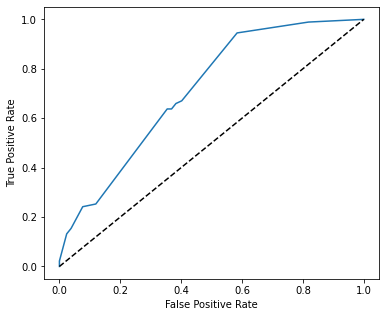

In [174]:
plt.figure(figsize = (6,5))
test_probabilities = best_dt.predict_proba(X_test)[::,-1] # predicting probabilities on test set
fpr, tpr, __ = roc_curve(Y_test, test_probabilities) # roc curve on test labels and predicted probabilities

#plotting the roc curve
plt.plot(fpr,tpr) 
plt.plot([0,1], [0,1], 'k--')

#x and y labels
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#show plot
plt.show()

In [175]:
print(roc_auc_score(Y_test, test_probabilities)) # roc_auc_score

0.7120248172879752


After looking at the roc curve we clear;ly see that while the curve is above the tpr = fpr line, it is not very close to the top left of the graph. Thus it is not a very good accuracy. This can further be seen with an roc_auc score of just 0.712

## Q.2) 
Visualize the tree using graphviz software

In [182]:
os.environ["PATH"] += os.pahsep + 'C:/Users/Public/anaconda3/Library/bin/graphviz/' # adding graphviz path to enviornment

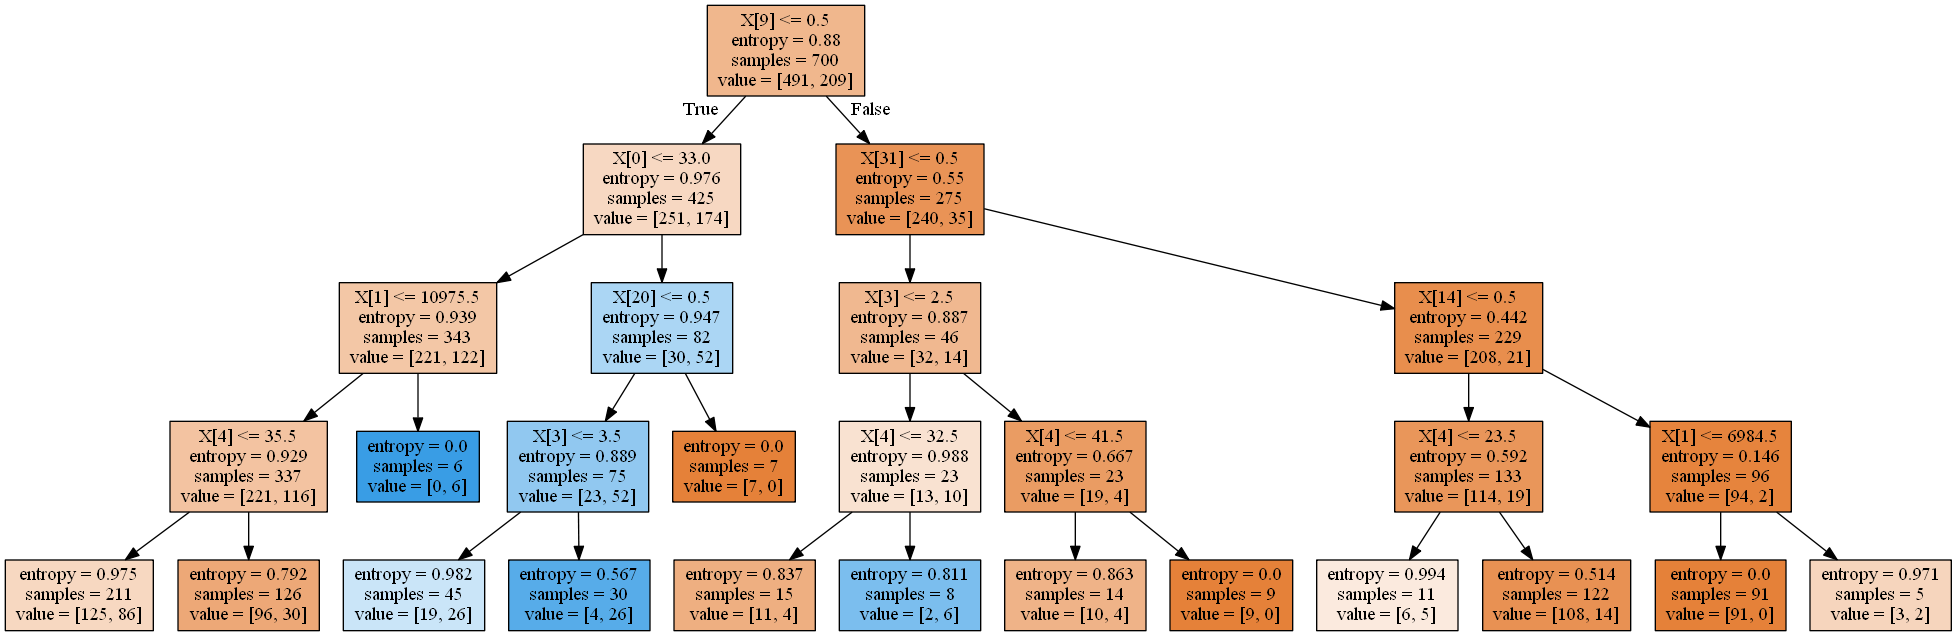

In [178]:
# using graphviz to visualise the tree

dot_data = StringIO()  

tree.export_graphviz(best_dt, out_file=dot_data, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [180]:
fig.savefig('DecisionTree.png')

## Q.3) 
Display the text representation of the rules learnt

In [184]:
best_dt_text = tree.export_text(best_dt)

print(best_dt_text)

|--- feature_9 <= 0.50
|   |--- feature_0 <= 33.00
|   |   |--- feature_1 <= 10975.50
|   |   |   |--- feature_4 <= 35.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  35.50
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  10975.50
|   |   |   |--- class: 1
|   |--- feature_0 >  33.00
|   |   |--- feature_20 <= 0.50
|   |   |   |--- feature_3 <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  3.50
|   |   |   |   |--- class: 1
|   |   |--- feature_20 >  0.50
|   |   |   |--- class: 0
|--- feature_9 >  0.50
|   |--- feature_31 <= 0.50
|   |   |--- feature_3 <= 2.50
|   |   |   |--- feature_4 <= 32.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  32.50
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  2.50
|   |   |   |--- feature_4 <= 41.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  41.50
|   |   |   |   |--- class: 0
|   |--- feature_31 >  0.50
|   |   |--- feature_14 <= 0.50
|   |   |   |--- feature_4 <= 23.50
